# 决策树

In [10]:
# %load E:\\Learning\\机器学习\\(Part One)深度学习基础\\代码与素材(1)\\01DTree\\AllElectronics.py
from sklearn.feature_extraction import DictVectorizer
import csv
from sklearn import tree
from sklearn import preprocessing
from sklearn.externals.six import StringIO

# Read in the csv file and put features into list of dict and list of class label
allElectronicsData = open(r'E:/Learning/机器学习/(Part One)深度学习基础/代码与素材(1)/01DTree/AllElectronics.csv', 'rt')
reader = csv.reader(allElectronicsData)
headers = next(reader)

print(headers)

featureList = []
labelList = []

for row in reader:
    labelList.append(row[len(row)-1])
    rowDict = {}
    for i in range(1, len(row)-1):
        rowDict[headers[i]] = row[i]
    featureList.append(rowDict)

print(featureList)

# Vetorize features
vec = DictVectorizer()
dummyX = vec.fit_transform(featureList) .toarray()

print("dummyX: " + str(dummyX))
print(vec.get_feature_names())

print("labelList: " + str(labelList))

# vectorize class labels
lb = preprocessing.LabelBinarizer()
dummyY = lb.fit_transform(labelList)
print("dummyY: " + str(dummyY))

# Using decision tree for classification
# clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(dummyX, dummyY)
print("clf: " + str(clf))


# Visualize model
#with open("allElectronicInformationGainOri.dot", 'w') as f:
  #  f = tree.export_graphviz(clf, feature_names=vec.get_feature_names(), out_file=f)#通过graphviz把dot转化为pdf直接展示决策树


oneRowX = dummyX[0, :]#取原来数据的第一行，用来测试预测的结果
print("oneRowX: " + str(oneRowX))

newRowX = oneRowX#修改部分属性
newRowX[0] = 1
newRowX[2] = 0
print("newRowX: " + str(newRowX))
print("newRowX.reshape: " + str(newRowX.reshape(1, -1)))
predictedY = clf.predict(newRowX.reshape(1, -1))#需要将数据reshape(1, -1)处理 变成2d array
print("predictedY: " + str(predictedY))




['RID', 'age', 'income', 'student', 'credit_rating', 'class_buys_computer']
[{'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'youth', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'medium', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'middle_age

# KNN

In [13]:
# %load E:\\Learning\\机器学习\\(Part One)深度学习基础\\代码与素材(1)\\02KNN\\KNN.py
import math
def ComputeEuclideanDistance(x1, y1, x2, y2):
    d = math.sqrt(math.pow((x1-x2), 2) + math.pow((y1-y2), 2))#计算每两个实例间的欧式距离
    return d

d_ag = ComputeEuclideanDistance(3, 104, 18, 90)

print(d_ag)


20.518284528683193


In [7]:
# %load E:\\Learning\\机器学习\\(Part One)深度学习基础\\代码与素材\\02KNN\\iris.py
#调用sklearn 中的函数直接预测
from sklearn import neighbors
from sklearn import datasets

knn = neighbors.KNeighborsClassifier()

iris = datasets.load_iris()
# save data
# f = open("iris.data.csv", 'wb')
# f.write(str(iris))
# f.close()

print(iris)

knn.fit(iris.data, iris.target)

predictedLabel = knn.predict([[0.1, 0.2, 0.3, 0.4]])
print( "hello")
#print ("predictedLabel is :" + predictedLabel)
print(predictedLabel)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [31]:
# %load E:\\Learning\\机器学习\\(Part One)深度学习基础\\代码与素材\\02KNN\\KNNImplementation.py
#不直接调用函数，逐步完成knn所有步骤
import csv
import random
import math
import operator


def loadDataset(filename, split, trainingSet = [], testSet = []):
    with open(filename, 'rt') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x]-instance2[x]), 2)
    return math.sqrt(distance)


def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        #testinstance
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
        #distances.append(dist)
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
        return neighbors


def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))*100.0


def main():
    #prepare data
    trainingSet = []
    testSet = []
    split = 0.67
    loadDataset(r'E:/Learning/机器学习/(Part One)深度学习基础/代码与素材/02KNN/irisdata.txt', split, trainingSet, testSet)
    print( 'Train set: ' + repr(len(trainingSet)))
    print( 'Test set: ' + repr(len(testSet)))
    
    #generate predictions
    predictions = []
    k = 3
    for x in range(len(testSet)):
        # trainingsettrainingSet[x]
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print ('>predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

if __name__ == '__main__':
    main()


Train set: 102
Test set: 48
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-versicolor', actual='Iris-versicolor'
>predicted='Iris-versicolor', actual='Iris-versicolor'
>predicted='Iris-versicolor', actual='Iris-versicolor'
>predicted='Iris-versicolor', actual='Iris-versicolor'


# SVM

In [6]:
# %load E:\\Learning\\机器学习\\(Part One)深度学习基础\\代码与素材\\03SVM\\sklearnsimple.py
from sklearn import svm


x = [[2, 0], [1, 1], [2, 3]]
y = [0, 0, 1]
clf = svm.SVC(kernel = 'linear')
clf.fit(x, y)

print(clf) 

# get support vectors
print( clf.support_vectors_)#显示所有的支撑向量
# get indices of support vectors
print(clf.support_) #显示支撑向量的位置
# get number of support vectors for each class
print(clf.n_support_) #每类的支撑向量个数
print(clf.predict([[2,2]]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[[1. 1.]
 [2. 3.]]
[1 2]
[1 1]
[1]


w:  [0.47625237 0.55222695]
a:  -0.8624214580005286
support_vectors_:  [[-1.83368324 -0.91878394]
 [-1.1445698  -1.51375963]
 [ 0.25297628  0.90333545]]
clf.coef_:  [[0.47625237 0.55222695]]


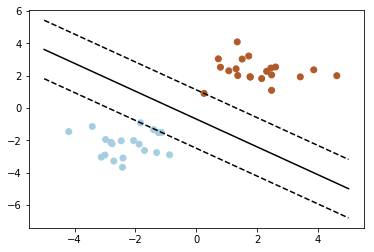

In [12]:
# %load E:\\Learning\\机器学习\\(Part One)深度学习基础\\代码与素材\\03SVM\\sklearnExample.py
%matplotlib inline 
import numpy as np
import pylab as pl
from sklearn import svm

# we create 40 separable points
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]] #中心分别是（-2，-2）和（2，2）
#np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，类似于pandas中的concat()。
#p.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()。
Y = [0]*20 +[1]*20

#fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-5, 5)
yy = a*xx - (clf.intercept_[0])/w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a*xx + (b[1] - a*b[0])
b = clf.support_vectors_[-1]
yy_up = a*xx + (b[1] - a*b[0])

print("w: ", w) 
print("a: ", a) 

# print "xx: ", xx
# print "yy: ", yy
print("support_vectors_: ", clf.support_vectors_) 
print("clf.coef_: ", clf.coef_) 

# switching to the generic n-dimensional parameterization of the hyperplan to the 2D-specific equation
# of a line y=a.x +b: the generic w_0x + w_1y +w_3=0 can be rewritten y = -(w_0/w_1) x + (w_3/w_1)


# plot the line, the points, and the nearest vectors to the plane
pl.plot(xx, yy, 'k-')
pl.plot(xx, yy_down, 'k--')
pl.plot(xx, yy_up, 'k--')

pl.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
          s=80, facecolors='none')
pl.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

pl.axis('tight')
pl.show()

In [ ]:
%load E:\\Learning\\机器学习\\(Part One)深度学习基础\\代码与素材\\03SVM\\sklearnExample.py